# HSE 2024: Mathematical Methods for Data Analysis

## Homework 2

# Attention!

* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

If the task asks for an explanation of something, it means that a written answer is required, which is part of the task and is assessed

We only accept ipynb notebooks. If you use Google Colab, you need to download the notebook before submitting your homework

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we will use a dataset of tracks from the streaming service Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Target variable**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [ ]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

## Linear Regression

#### 0. [0.25 points] Code the categorical features. Explain the method you have chosen.

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_encoded = pd.get_dummies(X, columns=['track_genre'])
X_encoded = X_encoded.drop(['artists'], axis=1)
X_encoded = X_encoded.drop(['track_name'], axis=1)

album_song_counts = X_encoded['album_name'].value_counts()
X_encoded['album_cnt'] = X_encoded['album_name'].map(album_song_counts)
X_encoded = X_encoded.drop(['album_name'], axis=1)
X_encoded['album_cnt'] = X_encoded['album_cnt'].fillna(1)

In [ ]:
X_droped = X.drop(['artists'], axis=1)
X_droped = X_droped.drop(['album_name'], axis=1)
X_droped = X_droped.drop(['track_name'], axis=1)
X_droped = X_droped.drop(['track_genre'], axis=1)

In [ ]:
X_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
dtypes: bool(1), float64(8), int64(5)
memory usage: 11.4 MB


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Columns: 129 entries, popularity to album_cnt
dtypes: bool(115), float64(9), int64(5)
memory usage: 24.7 MB


#### 1. [0.25 points] Split the data into train and test with a ratio of 80:20 and random_state=42.

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_test, y_train, y_test = train_test_split(X_droped, y, test_size=0.2, random_state=42)

#### 2. [0.75 points] Train models on train, excluding categorical features, using the StatsModels library and apply it to test; use $RMSE$ and $R^2$ as quality metrics. Try also applying linear regression implementations from sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$

Don't forget to scale your data using StandardScaler before training your models!

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Модель StatsModels
def get_StatsModels(X_train_scaled, X_test_scaled, y_train, y_test):
  X_train_sm = sm.add_constant(X_train_scaled)
  X_test_sm = sm.add_constant(X_test_scaled)
  model_sm = sm.OLS(y_train, X_train_sm).fit()
  y_pred_sm = model_sm.predict(X_test_sm)

  rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred_sm))
  r2_sm = r2_score(y_test, y_pred_sm)
  print("StatsModels OLS Regression:")
  print(f"RMSE: {rmse_sm:.6f}")
  print(f"R²: {r2_sm:.6f}")
  return model_sm

# 2. Linear Regression (sklearn)
def get_LinearRegression(X_train_scaled, X_test_scaled, y_train, y_test):
  linear_model = LinearRegression()
  linear_model.fit(X_train_scaled, y_train)
  y_pred_lr = linear_model.predict(X_test_scaled)

  rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
  r2_lr = r2_score(y_test, y_pred_lr)
  print("Linear Regression (sklearn):")
  print(f"RMSE: {rmse_lr:.6f}")
  print(f"R²: {r2_lr:.6f}")
  return linear_model

# 3. Ridge Regression (α=0.03)
def get_Ridge(X_train_scaled, X_test_scaled, y_train, y_test):
  ridge_model = Ridge(alpha=0.03)
  ridge_model.fit(X_train_scaled, y_train)
  y_pred_ridge = ridge_model.predict(X_test_scaled)

  rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
  r2_ridge = r2_score(y_test, y_pred_ridge)
  print("Ridge Regression (α=0.03):")
  print(f"RMSE: {rmse_ridge:.6f}")
  print(f"R²: {r2_ridge:.6f}")
  return ridge_model

# 4. Lasso Regression (α=0.05)
def get_Lasso(X_train_scaled, X_test_scaled, y_train, y_test):
  lasso_model = Lasso(alpha=0.05)
  lasso_model.fit(X_train_scaled, y_train)
  y_pred_lasso = lasso_model.predict(X_test_scaled)

  rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
  r2_lasso = r2_score(y_test, y_pred_lasso)
  print("Lasso Regression (α=0.05):")
  print(f"RMSE: {rmse_lasso:.6f}")
  print(f"R²: {r2_lasso:.6f}")
  return lasso_model

In [ ]:
model_sm1 = get_StatsModels(X_train_scaled, X_test_scaled, y_train, y_test)
get_LinearRegression(X_train_scaled, X_test_scaled, y_train, y_test)
get_Ridge(X_train_scaled, X_test_scaled, y_train, y_test)
get_Lasso(X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')

StatsModels OLS Regression:
RMSE: 0.121711
R²: 0.764628
Linear Regression (sklearn):
RMSE: 0.121711
R²: 0.764628
Ridge Regression (α=0.03):
RMSE: 0.121711
R²: 0.764628
Lasso Regression (α=0.05):
RMSE: 0.147984
R²: 0.652044




#### 3. [0.25 points] Repeat the steps from the previous point, adding categorical features. Comment on the changes in the quality metrics values

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_sm2 = get_StatsModels(X_train_scaled, X_test_scaled, y_train, y_test)
get_LinearRegression(X_train_scaled, X_test_scaled, y_train, y_test)
get_Ridge(X_train_scaled, X_test_scaled, y_train, y_test)
get_Lasso(X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')

StatsModels OLS Regression:
RMSE: 0.112799
R²: 0.797835
Linear Regression (sklearn):
RMSE: 0.112805
R²: 0.797814
Ridge Regression (α=0.03):
RMSE: 0.112799
R²: 0.797835
Lasso Regression (α=0.05):
RMSE: 0.147984
R²: 0.652044




RMSE уменьшилось, а $R^2$ увеличилось, что говорит о том, что модель стала точнее.

#### 4. [1 point] Examine the parameter values ​​of the models obtained from StatsModels and check which weights and in which models turned out to be zero. Comment on the significance of the coefficients, the overall significance of the models and other factors from the resulting tables

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

print("StatsModels1 OLS Regression Summary:")
print(model_sm1.summary())

# Получение весов модели
print("\nStatsModels1 OLS Regression Coefficients:")
print(model_sm1.params)

StatsModels1 OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 2.133e+04
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:21:26   Log-Likelihood:                 62649.
No. Observations:               91200   AIC:                        -1.253e+05
Df Residuals:                   91185   BIC:                        -1.251e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

Самый маленький по модулю коэффицент у х5 фичи. Это duration_ms, т.е. длительность песни меньше всего влияет на энергию

In [ ]:
print("StatsModels2 OLS Regression Summary:")
print(model_sm2.summary())

# Получение весов модели
print("\nStatsModels2 OLS Regression Coefficients:")
print(model_sm2.params)
print(X_encoded.columns[18])
print(X_encoded.columns[128])

StatsModels2 OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2873.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:21:26   Log-Likelihood:                 70143.
No. Observations:               91200   AIC:                        -1.400e+05
Df Residuals:                   91071   BIC:                        -1.388e+05
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

Самые маленькие значения у track_genre_ambient и album_cnt. Т.е. принадлежность к жанру ambient и количесво песен в альбме слабо влияют на энергию песни.

#### 5. [1 point] Implement one of the feature selection algorithms (Elimination by P-value, Forward elimination, Backward elimination), draw conclusions.

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def backward_elimination(X_train_scaled: pd.DataFrame, y_train: list, X_test: pd.DataFrame,  sig_level=0.05):

    while True:

        model = sm.OLS(y_train, X_train_scaled).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        #print(np.sort(p_values))
        #print("\n------------------------------------------------------------------\n")
        if max_p_value > sig_level:
            excluded_feature = np.argmax(p_values)
            print(f"Исключаем {excluded_feature} с p-значением {max_p_value}")
            id = int(excluded_feature)
            X_train_scaled.drop(X_train_scaled.columns[id], axis=1, inplace=True)
            X_test.drop(X_test.columns[id], axis=1, inplace=True)
        else:
            break
    return X_test, model

In [ ]:
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)
X_test_sm, model_pval = backward_elimination(pd.DataFrame(X_train_scaled_sm), list(y_train), pd.DataFrame(X_test_sm))

Исключаем 19 с p-значением 0.9426266247240349
Исключаем 128 с p-значением 0.8130880685362579
Исключаем 67 с p-значением 0.6595457923668586
Исключаем 52 с p-значением 0.6172794144342924
Исключаем 46 с p-значением 0.7132682146681758
Исключаем 92 с p-значением 0.7075311767135715
Исключаем 16 с p-значением 0.6409564006302622
Исключаем 73 с p-значением 0.2741774299168226
Исключаем 18 с p-значением 0.32493149049184733
Исключаем 64 с p-значением 0.3540942875841331
Исключаем 42 с p-значением 0.29582705057427355
Исключаем 109 с p-значением 0.31643531812491826
Исключаем 41 с p-значением 0.34918459093925736
Исключаем 16 с p-значением 0.2532028835995191


In [ ]:
y_pred_sm = model_pval.predict(X_test_sm)

rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred_sm))
r2_sm = r2_score(y_test, y_pred_sm)
print("StatsModels OLS Regression:")
print(f"RMSE: {rmse_sm:.6f}")
print(f"R²: {r2_sm:.6f}")

StatsModels OLS Regression:
RMSE: 0.112800
R²: 0.797831


Значения почти не изменились, так что это мало повлияло на результат

#### 6. [1 point] Find the best (RMSE) $\alpha$ for Lasso regression using 4-fold cross-validation. You should choose a value from the logarithmic range $[10^{-4}, 10^{3}]$.

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LassoCV

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-4, 3, 50)

lasso_cv = LassoCV(alphas=alphas, cv=4, random_state=42)

lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Оптимальное значение alpha: {best_alpha}")

y_pred = lasso_cv.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE на тестовых данных: {rmse}")

Оптимальное значение alpha: 0.0001
RMSE на тестовых данных: 0.1127901574424143


## Gradient Descent

#### 7. [3.5 points] Implement Ridge regression for MSE loss trained using gradient descent.

All computations must be vectorized, and Python loops can only be used for gradient descent iterations. The stopping criteria must be (simultaneously):

* checking the absolute norm of the difference in weights on two adjacent iterations (e.g., less than some small number of the order of $10^{-6}$, specified by the `tolerance` parameter);

* reaching the maximum number of iterations (e.g., 10000, specified by the `max_iter` parameter).

You need to do:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is an estimate of the gradient over a set of objects chosen at random.

* Moment of method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

To verify that the optimization process is actually running, we will use the `loss_history` class attribute. After calling the fit method, it should contain the loss function values ​​for all iterations starting from the first (up to the first step along the antigradient).

You need to initialize the weights with a random vector from a normal distribution. Below is a template that should contain code implementing all the model variants.

In [ ]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf=1.0, epsilon=1e-8):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.reg_cf = reg_cf
        self.epsilon = epsilon
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        l, d = X.shape
        # Initialize weights
        self.w = np.random.randn(d) if self.w0 is None else self.w0
        self.loss_history = []

        # Initialization for different gradient descent variants
        if self.gd_type == 'Momentum':
            h = np.zeros(d)
        elif self.gd_type == 'Adagrad':
            G = np.zeros(d)

        for iteration in range(self.max_iter):

            if self.gd_type == 'GradientDescent':
                gradient = self.calc_gradient(X, y)
                self.w -= self.eta * gradient
            elif self.gd_type == 'StochasticDescent':
                batch_size = max(1, int(self.delta * X.shape[0]))
                indices = np.random.choice(X.shape[0], batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y.iloc[indices]
                gradient = self.calc_gradient(X_batch, y_batch)
                self.w -= self.eta * gradient
            elif self.gd_type == 'Momentum':
                gradient = self.calc_gradient(X, y)
                h = self.alpha * h + self.eta * gradient
                self.w -= h
            elif self.gd_type == 'Adagrad':
                gradient = self.calc_gradient(X, y)
                G += gradient ** 2
                self.w -= self.eta * gradient / (np.sqrt(G) + self.epsilon)

            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)

            # Check stopping criteria
            if np.linalg.norm(self.w - (self.w - self.eta * gradient)) < self.tolerance:
                break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        l, d = X.shape
        predictions = np.dot(X, self.w)
        errors = predictions - y

        gradient = (2 / l) * (np.dot(X.T, errors) + self.reg_cf * self.w)
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        l = X.shape[0]
        predictions = np.dot(X, self.w)
        errors = predictions - y

        loss = (1 / l) * np.sum(errors ** 2) + self.reg_cf * np.sum(self.w ** 2)
        return loss

#### 8. [1 point] Train and validate "manual" models on the same data, compare the quality with models from Sklearn and StatsModels. Investigate the influence of the `max_iter` and `alpha` parameters on the optimization process. Does it meet your expectations?

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_droped = X.drop(['artists'], axis=1)
X_droped = X_droped.drop(['album_name'], axis=1)
X_droped = X_droped.drop(['track_name'], axis=1)
X_droped = X_droped.drop(['track_genre'], axis=1)
X_droped = X_droped.drop(['explicit'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_droped, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91200 entries, 84744 to 15795
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        91200 non-null  int64  
 1   duration_ms       91200 non-null  int64  
 2   danceability      91200 non-null  float64
 3   key               91200 non-null  int64  
 4   loudness          91200 non-null  float64
 5   mode              91200 non-null  int64  
 6   speechiness       91200 non-null  float64
 7   acousticness      91200 non-null  float64
 8   instrumentalness  91200 non-null  float64
 9   liveness          91200 non-null  float64
 10  valence           91200 non-null  float64
 11  tempo             91200 non-null  float64
 12  time_signature    91200 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 9.7 MB


In [ ]:
models = {
    'GradientDescent': LinReg(gd_type='GradientDescent', max_iter=1000, eta=1e-2, reg_cf=0.03, alpha=0.001),
    'StochasticDescent': LinReg(gd_type='StochasticDescent', max_iter=3000, eta=1e-2, delta=0.1, reg_cf=1, alpha=0.001),
    'Momentum': LinReg(gd_type='Momentum', max_iter=1000, eta=1e-2, alpha=0.0001, reg_cf=0.03),
    'Adagrad': LinReg(gd_type='Adagrad', max_iter=10000, eta=1e-2, reg_cf=0.3, epsilon=1e-8, alpha=0.01)
}

In [ ]:
def try_model(name, X_train_scaled, X_test_scaled, y_train, y_test):
  manual_model = models[name]
  #LinReg(gd_type=name, max_iter=max_iter, eta=1e-3, reg_cf=0.01, alpha=alpha)
  manual_model.fit(X_train_scaled, y_train)


  y_pred = manual_model.predict(X_test_scaled)
  rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred))

  print(f'{name}:')
  print(f'Loss: {manual_model.calc_loss(X_test_scaled, y_test)}')
  print(f"RMSE: {rmse_sm:.6f}")


In [ ]:
try_model('Momentum', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('Adagrad', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('GradientDescent', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('StochasticDescent', X_train_scaled, X_test_scaled, y_train, y_test)

Momentum:
Loss: 0.42659829172630664
RMSE: 0.652389
Adagrad:
Loss: 0.7325213596295793
RMSE: 0.800039
GradientDescent:
Loss: 0.4268784055461056
RMSE: 0.652509
StochasticDescent:
Loss: 0.46024343352946934
RMSE: 0.652393


In [ ]:
models['Momentum'].max_iter = 4000
models['Adagrad'].max_iter = 12000
models['GradientDescent'].max_iter = 1000
models['StochasticDescent'].max_iter = 3000

try_model('Momentum', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('Adagrad', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('GradientDescent', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('StochasticDescent', X_train_scaled, X_test_scaled, y_train, y_test)

models['Momentum'].max_iter = 1000
models['Adagrad'].max_iter = 10000
models['GradientDescent'].max_iter = 4000
models['StochasticDescent'].max_iter = 4000

Momentum:
Loss: 0.42668235475722677
RMSE: 0.652427
Adagrad:
Loss: 0.5450053513070482
RMSE: 0.702328
GradientDescent:
Loss: 0.42663003504343877
RMSE: 0.652402
StochasticDescent:
Loss: 0.4604233625190009
RMSE: 0.652391


Увеличение количества итераций уменьшает значение loss функции, если модель не успела доучиться,сили не сильно изменяет результат, если прошло уже достаточное количесво итераций.

In [ ]:
models['Momentum'].alpha = 0.001
models['Adagrad'].alpha = 0.1
models['GradientDescent'].alpha = 0.01
models['StochasticDescent'].alpha = 0.01

try_model('Momentum', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('Adagrad', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('GradientDescent', X_train_scaled, X_test_scaled, y_train, y_test)
try_model('StochasticDescent', X_train_scaled, X_test_scaled, y_train, y_test)

models['Momentum'].alpha = 0.0001
models['Adagrad'].alpha = 0.01
models['GradientDescent'].alpha = 0.001
models['StochasticDescent'].alpha = 0.001

Momentum:
Loss: 0.42669393747522505
RMSE: 0.652433
Adagrad:
Loss: 0.4418009470134921
RMSE: 0.653959
GradientDescent:
Loss: 0.4266469142824733
RMSE: 0.652407
StochasticDescent:
Loss: 0.46060381621332136
RMSE: 0.652376


При изменении alpha трудно проследить изменения loss функции, так как alpha контролирует степень, с которой предыдущие шаги учитываются в текущем направлении градиентного спуска.

#### 9. [1 point] Plot graphs of the loss function values ​​as a function of the iteration number for all models (full gradient descent, stochastic gc, Momentum, and Adagrad). Draw conclusions about the convergence rate of various modifications of gradient descent.

Don't forget about what a *nice* graph should look like!

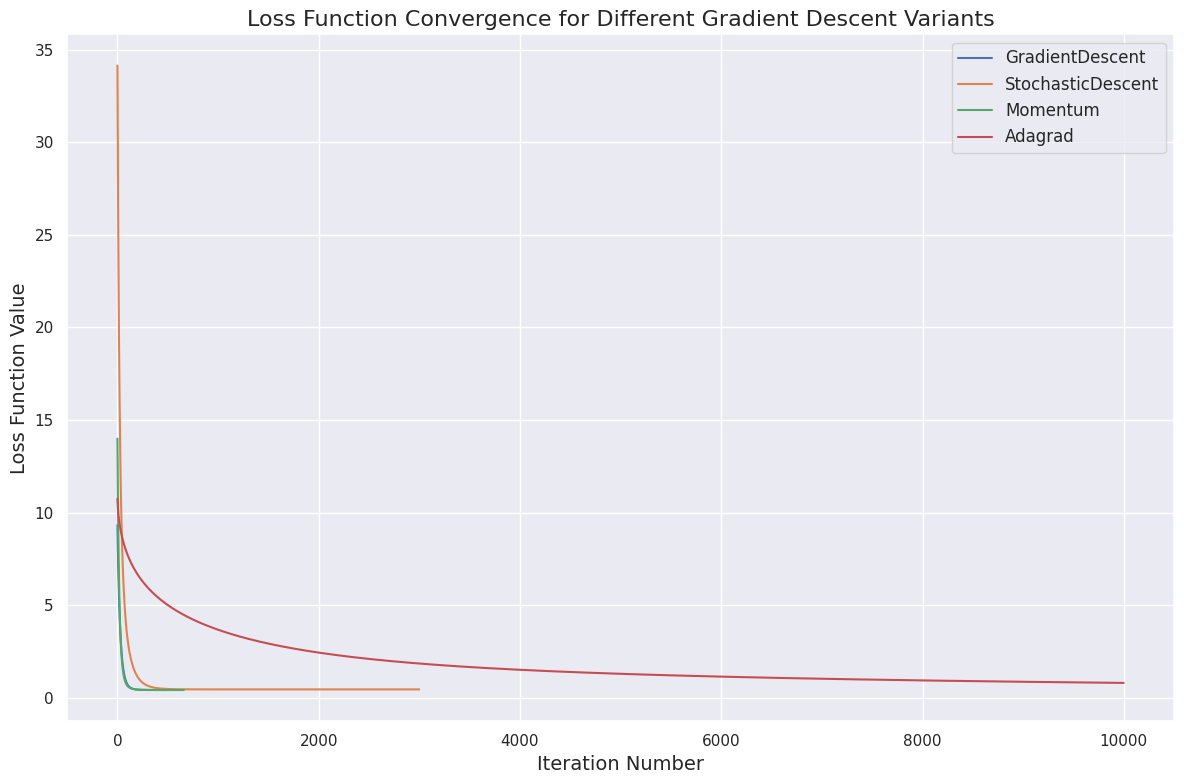

In [ ]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

loss_histories = {}

# Train each model and collect loss history
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    loss_histories[model_name] = model.loss_history

# Plotting the loss function values for each model
plt.figure(figsize=(12, 8))

for model_name, loss_history in loss_histories.items():
    plt.plot(loss_history, label=model_name)

# Customize the plot
plt.title('Loss Function Convergence for Different Gradient Descent Variants', fontsize=16)
plt.xlabel('Iteration Number', fontsize=14)
plt.ylabel('Loss Function Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Adagrad медленно сходится по сравнению с другими методами. Остальные 3 метода показали примерно одинаковый результат. GradientDescent и Momentum сходятся почти одинаково быстро, StochasticDescent чуть медленнее.